In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, f1_score, ConfusionMatrixDisplay

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [2]:
assert(len(tf.config.list_physical_devices('GPU')) > 0), "You are not using GPU"
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
X = np.load("../data/X.npy")
Y = np.load("../data/Y.npy")

In [4]:
X.shape

(109511, 32, 27)

In [5]:
Y.shape

(109511,)

In [6]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.1, random_state=452)

In [7]:
print(Xtrain.shape)
print(Ytrain.shape)
print(Xtest.shape)
print(Ytest.shape)

(98559, 32, 27)
(98559,)
(10952, 32, 27)
(10952,)


In [8]:
model = Sequential()
model.add(LSTM(128, input_shape=(X.shape[1], X.shape[2])))
model.add(Dense(1, activation='sigmoid'))

In [9]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
history = model.fit(Xtrain, Ytrain, epochs=20, batch_size=64, validation_split=0.2, use_multiprocessing=True)

Epoch 1/20
1232/1232 [==============================] - 18s 13ms/step - loss: 0.3092 - accuracy: 0.9045 - val_loss: 0.3131 - val_accuracy: 0.9025
Epoch 2/20
1232/1232 [==============================] - 16s 13ms/step - loss: 0.3048 - accuracy: 0.9059 - val_loss: 0.3116 - val_accuracy: 0.9027
Epoch 3/20
1232/1232 [==============================] - 16s 13ms/step - loss: 0.3041 - accuracy: 0.9060 - val_loss: 0.3109 - val_accuracy: 0.9029
Epoch 4/20
1232/1232 [==============================] - 16s 13ms/step - loss: 0.3037 - accuracy: 0.9063 - val_loss: 0.3129 - val_accuracy: 0.9029
Epoch 5/20
1232/1232 [==============================] - 16s 13ms/step - loss: 0.3035 - accuracy: 0.9062 - val_loss: 0.3134 - val_accuracy: 0.9007
Epoch 6/20
1232/1232 [==============================] - 16s 13ms/step - loss: 0.3032 - accuracy: 0.9064 - val_loss: 0.3110 - val_accuracy: 0.9030
Epoch 7/20
1232/1232 [==============================] - 17s 13ms/step - loss: 0.3029 - accuracy: 0.9065 - val_loss: 0.3110 -

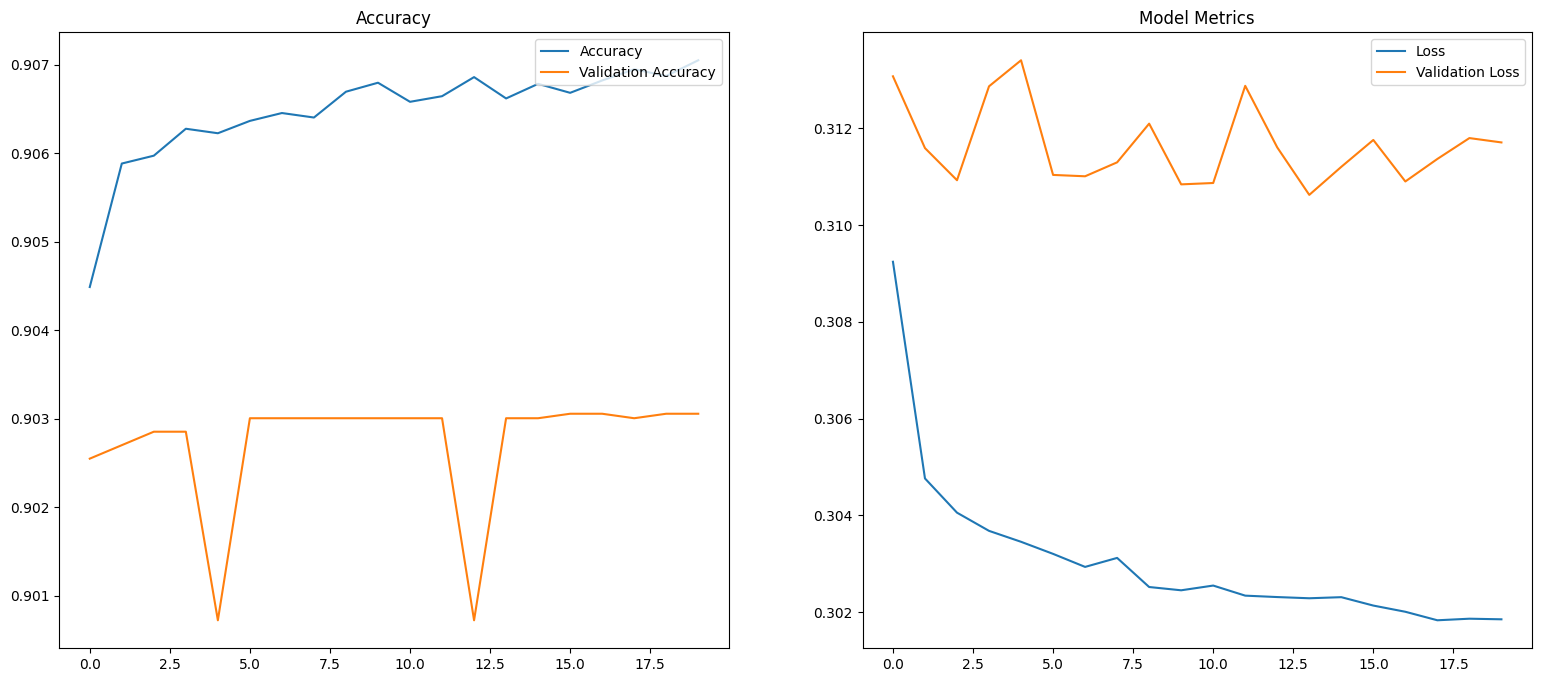

In [11]:
fig, axis = plt.subplots(1, 2, figsize=(19,8))

axis[0].plot(range(0, 20), history.history["accuracy"], label= "Accuracy")
axis[0].plot(range(0, 20), history.history["val_accuracy"], label= "Validation Accuracy")
axis[0].set_title("Accuracy")
axis[0].legend(loc='upper right')

axis[1].plot(range(0, 20), history.history["loss"], label= "Loss")
axis[1].plot(range(0, 20), history.history["val_loss"], label= "Validation Loss")
axis[1].set_title("Loss")
axis[1].legend(loc='upper right')

plt.title("Model Metrics")
plt.show()

In [12]:
loss, accuracy = model.evaluate(Xtest, Ytest)
print(f'Test loss: {loss}, Test accuracy: {accuracy}')

343/343 [==============================] - 2s 3ms/step - loss: 0.3048 - accuracy: 0.9060
Test loss: 0.30484524369239807, Test accuracy: 0.9060445427894592


In [13]:
ypred = model.predict(Xtest)
ypred = ypred.reshape(ypred.shape[0])

threshold = 0.5
ypred = (ypred > threshold).astype(bool)

accuracy = accuracy_score(Ytest, ypred)
print(f"Accuracy: {accuracy}")

343/343 [==============================] - 1s 2ms/step
Accuracy: 0.9060445580715851


Confusion Matrix:


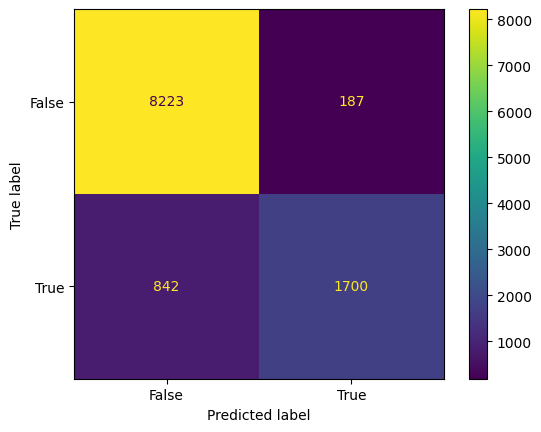

In [14]:
cm = confusion_matrix(Ytest, ypred)
print("Confusion Matrix:")
cmd = ConfusionMatrixDisplay(cm, display_labels = [False, True])
cmd.plot()

In [15]:
# Calculate TP, TN, FP, FN
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

# Print the results
print(f"True Positives: {TP}")
print(f"True Negatives: {TN}")
print(f"False Positives: {FP}")
print(f"False Negatives: {FN}")

True Positives: 1700
True Negatives: 8223
False Positives: 187
False Negatives: 842


In [16]:
precision = precision_score(Ytest, ypred)
recall = recall_score(Ytest, ypred)
f1 = f1_score(Ytest, ypred)

print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)

F1 Score: 0.7676676450666065
Precision: 0.9009009009009009
Recall: 0.6687647521636507


In [17]:
def getModelSaveName():
    import os
    import ipynbname

    current_directory = os.getcwd()
    directory_name = os.path.basename(current_directory)
    notebook_name = ipynbname.name()

    return f"{directory_name}_{notebook_name}.keras"

In [18]:
# Saving the model to a file

model.save(getModelSaveName())